In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
zoo=pd.read_csv("Zoo.csv")
zoo.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [3]:
zoo.shape

(101, 18)

In [4]:
zoo.isnull().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [5]:
zoo.dtypes

animal name    object
hair            int64
feathers        int64
eggs            int64
milk            int64
airborne        int64
aquatic         int64
predator        int64
toothed         int64
backbone        int64
breathes        int64
venomous        int64
fins            int64
legs            int64
tail            int64
domestic        int64
catsize         int64
type            int64
dtype: object

In [6]:
zoo['animal name'].nunique()

100

In [7]:
zoo['type'].unique()

array([1, 4, 2, 7, 6, 5, 3], dtype=int64)

# Model building

In [8]:
x=zoo.iloc[:,1:-1]
y=zoo.iloc[:,-1:]

In [9]:
x

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


In [10]:
y

,type
0,1
1,1
2,4
3,1
4,1
...,...
96,1
97,6
98,1
99,7


In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [12]:
x_train

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
95,0,1,1,0,1,0,1,0,1,1,0,0,2,1,0,1
53,0,0,1,0,0,1,1,0,0,0,0,0,8,0,0,1
52,0,0,1,0,0,1,1,1,1,1,0,0,4,1,0,0
27,1,0,0,1,1,0,0,1,1,1,0,0,2,1,0,0
34,0,0,1,0,0,1,0,1,1,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,1
77,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0
94,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,0
44,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1


# Model training

In [13]:
import warnings
warnings.filterwarnings("ignore")

In [14]:
from sklearn.neighbors import KNeighborsClassifier
knn_model=KNeighborsClassifier(n_neighbors=11)

In [15]:
knn_model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=11)

# Model_testing

In [16]:
y_pred=knn_model.predict(x_test)

# Model evaluation

In [17]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [18]:
print(accuracy_score(y_test,y_pred))

0.8095238095238095


In [19]:
print(confusion_matrix(y_test,y_pred))

[[6 0 0 1 0 0 0]
 [0 4 0 0 0 0 0]
 [0 0 0 1 0 0 0]
 [0 0 0 5 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 2 0]
 [0 0 0 1 1 0 0]]


<AxesSubplot:>

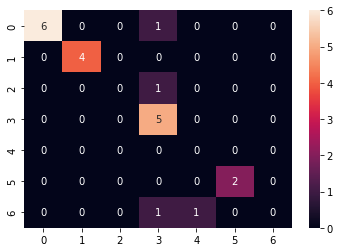

In [20]:
confusion_matrix_test=confusion_matrix(y_test,y_pred)
sns.heatmap(confusion_matrix_test,annot=True)

In [21]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       1.00      0.86      0.92         7
           2       1.00      1.00      1.00         4
           3       0.00      0.00      0.00         1
           4       0.62      1.00      0.77         5
           5       0.00      0.00      0.00         0
           6       1.00      1.00      1.00         2
           7       0.00      0.00      0.00         2

    accuracy                           0.81        21
   macro avg       0.52      0.55      0.53        21
weighted avg       0.77      0.81      0.78        21



# Tweaking K Value

In [22]:
for i in range(1,50,2):
    knn_model=KNeighborsClassifier(n_neighbors=i).fit(x_train,y_train)
    y_pred=knn_model.predict(x_test)
    print('k values is:',i)
    print(accuracy_score(y_test,y_pred))

k values is: 1
1.0
k values is: 3
0.9523809523809523
k values is: 5
0.9047619047619048
k values is: 7
0.8571428571428571
k values is: 9
0.8095238095238095
k values is: 11
0.8095238095238095
k values is: 13
0.8095238095238095
k values is: 15
0.8095238095238095
k values is: 17
0.8095238095238095
k values is: 19
0.8095238095238095
k values is: 21
0.7619047619047619
k values is: 23
0.7619047619047619
k values is: 25
0.5238095238095238
k values is: 27
0.5238095238095238
k values is: 29
0.5238095238095238
k values is: 31
0.47619047619047616
k values is: 33
0.47619047619047616
k values is: 35
0.47619047619047616
k values is: 37
0.47619047619047616
k values is: 39
0.47619047619047616
k values is: 41
0.47619047619047616
k values is: 43
0.42857142857142855
k values is: 45
0.47619047619047616
k values is: 47
0.38095238095238093
k values is: 49
0.38095238095238093


from the obtained accuracy,model gives good accuracy when the value of k is 3 or 5

In [23]:
knn_model=KNeighborsClassifier(n_neighbors=i).fit(x_train,y_train)
y_pred=knn_model.predict(x_test)
print('k values is:',3)
print(accuracy_score(y_test,y_pred))

k values is: 3
0.38095238095238093


In [24]:
knn_model=KNeighborsClassifier(n_neighbors=i).fit(x_train,y_train)
y_pred=knn_model.predict(x_test)
print('k values is:',5)
print(accuracy_score(y_test,y_pred))

k values is: 5
0.38095238095238093
